In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stat
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('delhivery_data.txt')

In [3]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [4]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
#lets see the columns which has numm values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [7]:
#droping the columns for which no information is given
df_v1=df.drop(columns=['cutoff_factor','cutoff_timestamp','is_cutoff','factor','segment_factor'])

In [8]:
df_v1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [9]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [10]:
#Changing to date type
df_v1['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df_v1['od_start_time']=pd.to_datetime(df['od_start_time'])
df_v1['od_end_time']=pd.to_datetime(df['od_end_time'])

In [11]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

#### MERGING ADN HANDLING NULL VALUES (WE DROP THE NULL VALUES)

In [12]:
dict_map={
    "data":"first",
    "trip_creation_time":"first",
    "route_type":"first",
    "od_start_time":'min',
    "od_end_time":"max",
    "start_scan_to_end_scan":"first",
    "actual_distance_to_destination":"sum",
    "actual_time":"last",
    "segment_actual_time":"sum",
    "osrm_time":"last",
    "segment_osrm_time":"sum",
    "osrm_distance":"last",
    "segment_osrm_distance":"sum"
}

In [13]:
df_xx=df_v1.groupby(["trip_uuid",]).agg({"source_center":"first","source_name":"first","destination_center":"last","destination_name":"last"}).reset_index()

In [14]:
df_v2_agg_1=df_v1.groupby(["route_schedule_uuid","trip_uuid","source_center","source_name","destination_center","destination_name"]).agg(dict_map).reset_index()

In [15]:
dict_map2={
    "data":"first",
    "trip_creation_time":"first",
    "route_type":"first",
    "source_center":"first",
    "source_name":"first",
    "destination_center":"last",
    "destination_name":"last",
    
    "od_start_time":'min',
    "od_end_time":"max",
    "start_scan_to_end_scan":"sum",
    "actual_distance_to_destination":"sum",
    "actual_time":"sum",
    "segment_actual_time":"sum",
    "osrm_time":"sum",
    "segment_osrm_time":"sum",
    "osrm_distance":"sum",
    "segment_osrm_distance":"sum"
}

In [16]:
df_v3_agg_2=df_v2_agg_1.groupby(["route_schedule_uuid","trip_uuid"]).agg(dict_map2).reset_index()

In [17]:
df_xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_uuid           14817 non-null  object
 1   source_center       14817 non-null  object
 2   source_name         14807 non-null  object
 3   destination_center  14817 non-null  object
 4   destination_name    14809 non-null  object
dtypes: object(5)
memory usage: 578.9+ KB


In [18]:
df_v3_agg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   route_schedule_uuid             14787 non-null  object        
 1   trip_uuid                       14787 non-null  object        
 2   data                            14787 non-null  object        
 3   trip_creation_time              14787 non-null  datetime64[ns]
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_start_time                   14787 non-null  datetime64[ns]
 10  od_end_time                     14787 non-null  datetime64[ns]
 11  st

In [19]:
df_merged=df_xx.merge(df_v3_agg_2,on='trip_uuid')

In [20]:
df_merged.drop(columns=['source_center_y', 'source_name_y',
       'destination_center_y', 'destination_name_y'],inplace=True)

In [21]:
df_merged['od_diff']=(df_merged['od_end_time']-df_merged['od_start_time'])

In [22]:
df_merged['od_diff_min']=df_merged['od_diff']/np.timedelta64(1,'m')

In [23]:
df_merged.drop(columns=['od_diff'],inplace=True)

In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14787 entries, 0 to 14786
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   source_center_x                 14787 non-null  object        
 2   source_name_x                   14787 non-null  object        
 3   destination_center_x            14787 non-null  object        
 4   destination_name_x              14787 non-null  object        
 5   route_schedule_uuid             14787 non-null  object        
 6   data                            14787 non-null  object        
 7   trip_creation_time              14787 non-null  datetime64[ns]
 8   route_type                      14787 non-null  object        
 9   od_start_time                   14787 non-null  datetime64[ns]
 10  od_end_time                     14787 non-null  datetime64[ns]
 11  st

####  SEPERATING PLACE CODE AND CITY

In [25]:
def v_split_check_1(a):
    s1,s2=a.split("(")
    return s2[:-1]
def v_split_check_2(a):
    s1,s2=a.split("(")
    return s1


def split_and_check(a):
    c=a.split("_")
    if(len(c)==1):
        for j in c:
            k=j.split(" ")
            if(len(k)==4):
                print(a,k,j)
            
    
                
            

In [26]:

city=[]
place=[]
code=[]

def split_and_check1(a,city=city,place=place,code=code):
    c=a.split("_")
    
    if(len(c)==4):
        
        city.append(c[0])
        place.append(c[1])
        code.append(c[2]+c[3])
    elif(len(c)==3):
       
        city.append(c[0])
        place.append(c[1])
        code.append(c[2])
    elif(len(c)==2):
    
        city.append(c[0])
        if(len(c[1])>3):
            place.append(c[1])
            code.append("UNKNOWN_CODE")
        else:
            place.append("UNKNOWN_PLACE")
            code.append(c[1])
    elif(len(c)==1):
        for j in c:
    
            k=j.split(" ")
            if(len(k)==2):
                
                city.append(k[0])
                place.append("UNKNOWN_PLACE")
                code.append("UNKNOWN_CODE")
            elif(len(k)==3):
                
                city.append("UNKNOWN_CITY")
                place.append(k[0])
                code.append(k[1])
            elif(len(k)==4):
                
                city.append("UNKNOWN_CITY")
                place.append(k[1])
                code.append(k[2])
            else:
                
                city.append("UNKNOWN_CITY")
                place.append("UNKNOWN_PLACE")
                code.append("UNKNOWN_CODE")
    else:
       
        city.append("UNKNOWN_CITY")
        place.append("UNKNOWN_PLACE")
        code.append("UNKNOWN_CODE")


In [27]:
destination_state=df_merged['destination_name_x'].apply(v_split_check_1)
desti_first=df_merged['destination_name_x'].apply(v_split_check_2)

In [28]:
desti_first.apply(split_and_check1)

0        None
1        None
2        None
3        None
4        None
         ... 
14782    None
14783    None
14784    None
14785    None
14786    None
Name: destination_name_x, Length: 14787, dtype: object

In [29]:
df_merged["destination_state"]=destination_state

In [30]:
df_merged["destination_city"]=city
df_merged["destination_place"]=place
df_merged["destination_code"]=code

In [31]:
city1=[]
place1=[]
code1=[]

def split_and_check1(a,city=city1,place=place1,code=code1):
    c=a.split("_")
    
    if(len(c)==4):
        
        city.append(c[0])
        place.append(c[1])
        code.append(c[2]+c[3])
    elif(len(c)==3):
       
        city.append(c[0])
        place.append(c[1])
        code.append(c[2])
    elif(len(c)==2):
    
        city.append(c[0])
        if(len(c[1])>3):
            place.append(c[1])
            code.append("UNKNOWN_CODE")
        else:
            place.append("UNKNOWN_PLACE")
            code.append(c[1])
    elif(len(c)==1):
        for j in c:
    
            k=j.split(" ")
            if(len(k)==2):
                
                city.append(k[0])
                place.append("UNKNOWN_PLACE")
                code.append("UNKNOWN_CODE")
            elif(len(k)==3):
                
                city.append("UNKNOWN_CITY")
                place.append(k[0])
                code.append(k[1])
            elif(len(k)==4):
                
                city.append("UNKNOWN_CITY")
                place.append(k[1])
                code.append(k[2])
            else:
                
                city.append("UNKNOWN_CITY")
                place.append("UNKNOWN_PLACE")
                code.append("UNKNOWN_CODE")
    else:
       
        city.append("UNKNOWN_CITY")
        place.append("UNKNOWN_PLACE")
        code.append("UNKNOWN_CODE")
    
                
            

In [32]:
source_state=df_merged['source_name_x'].apply(v_split_check_1)
source_first=df_merged['source_name_x'].apply(v_split_check_2)
source_first.apply(split_and_check1)

0        None
1        None
2        None
3        None
4        None
         ... 
14782    None
14783    None
14784    None
14785    None
14786    None
Name: source_name_x, Length: 14787, dtype: object

In [33]:
df_merged["source_city"]=city1
df_merged["source_place"]=place1
df_merged["source_code"]=code1
df_merged["source_state"]=source_state

In [34]:
df_merged['trip_creation_time_month']=df_v3_agg_2['trip_creation_time'].dt.month
df_merged['trip_creation_time_day']=df_v3_agg_2['trip_creation_time'].dt.day
df_merged['trip_creation_time_year']=df_v3_agg_2['trip_creation_time'].dt.year

In [35]:
df_merged.columns

Index(['trip_uuid', 'source_center_x', 'source_name_x', 'destination_center_x',
       'destination_name_x', 'route_schedule_uuid', 'data',
       'trip_creation_time', 'route_type', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'segment_actual_time', 'osrm_time', 'segment_osrm_time',
       'osrm_distance', 'segment_osrm_distance', 'od_diff_min',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'source_city', 'source_place', 'source_code',
       'source_state', 'trip_creation_time_month', 'trip_creation_time_day',
       'trip_creation_time_year'],
      dtype='object')

In [36]:
df_final=df_merged[['data','route_schedule_uuid','trip_uuid','source_center_x','source_name_x','source_city', 'source_place', 'source_code',
       'source_state','destination_center_x',
       'destination_name_x','destination_state', 'destination_city', 'destination_place',
       'destination_code','trip_creation_time','trip_creation_time_month', 'trip_creation_time_day',
       'trip_creation_time_year','route_type','od_start_time','od_end_time','start_scan_to_end_scan','od_diff_min','actual_distance_to_destination','actual_time', 'segment_actual_time', 'osrm_time', 'segment_osrm_time',
       'osrm_distance', 'segment_osrm_distance']].copy()

In [37]:
df_final.head(5)

,data,route_schedule_uuid,trip_uuid,source_center_x,source_name_x,source_city,source_place,source_code,source_state,destination_center_x,...,od_end_time,start_scan_to_end_scan,od_diff_min,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance
0,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Bhopal,Trnsport,H,Madhya Pradesh,IND000000ACB,...,2018-09-13 13:40:23.123744,2259.0,2260.109800,8860.812105,1562.0,1548.0,717.0,1008.0,991.3523,1320.4733
1,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Tumkur,Veersagr,I,Karnataka,IND562101AAA,...,2018-09-12 03:01:59.598855,180.0,181.611874,240.208306,143.0,141.0,68.0,65.0,85.1110,84.1894
2,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Bangalore,Nelmngla,H,Karnataka,IND160002AAC,...,2018-09-14 17:34:55.442454,3933.0,3934.362520,68163.502238,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.2678
3,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),UNKNOWN_CITY,Mumbai,Hub,Maharashtra,IND401104AAA,...,2018-09-12 01:41:29.809822,100.0,100.494935,28.529648,59.0,59.0,15.0,16.0,19.6800,19.8766
4,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,UNKNOWN_PLACE,Dc,Karnataka,IND583101AAA,...,2018-09-12 12:00:30.683231,717.0,718.349042,239.007304,341.0,340.0,117.0,115.0,146.7918,146.7919


#### OUTLIER DETECTION and MIN MAX MEAN OF NUMERICAL VARIABLE

In [38]:
def detetct_out(df,a):
    q1=np.quantile(df[a],0.25)
    q3=np.quantile(df[a],0.75)
    low_end=q1-1.5*(q3-q1)
    high_end=q3+1.5*(q3-q1)
    b=df[df[a]>high_end][a].tolist()
    c=df[df[a]<low_end][a].tolist()
    b=set(b)
    c=set(c)
    print("Outliers")
    print("number of Outliers for column(high end)",a,len(b))
    print("---------------------------------------------------")
    print("number of Outliers for column(low end)",a,len(c))
    print("----------------------------------------------------")
    print("minimum value of column",a,df[a].min())
    print("maximum value of column",a,df[a].max())
    print("mean value of column",a,df[a].mean())
    sns.boxplot(df[a])
    plt.show()
    sns.kdeplot(df[a])
    plt.show()
    print("---------------------------*********************************--------------------------------------------")
    

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14787 entries, 0 to 14786
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   route_schedule_uuid             14787 non-null  object        
 2   trip_uuid                       14787 non-null  object        
 3   source_center_x                 14787 non-null  object        
 4   source_name_x                   14787 non-null  object        
 5   source_city                     14787 non-null  object        
 6   source_place                    14787 non-null  object        
 7   source_code                     14787 non-null  object        
 8   source_state                    14787 non-null  object        
 9   destination_center_x            14787 non-null  object        
 10  destination_name_x              14787 non-null  object        
 11  de

Outliers
number of Outliers for column(high end) start_scan_to_end_scan 907
---------------------------------------------------
number of Outliers for column(low end) start_scan_to_end_scan 0
----------------------------------------------------
minimum value of column start_scan_to_end_scan 23.0
maximum value of column start_scan_to_end_scan 7898.0
mean value of column start_scan_to_end_scan 529.4290254953676


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


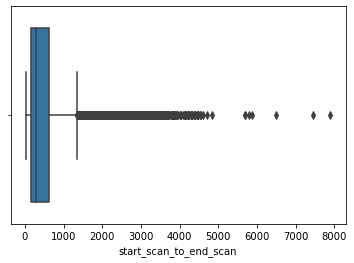

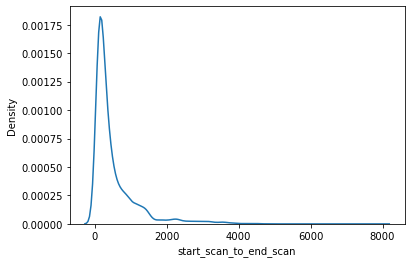

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) od_diff_min 1116
---------------------------------------------------
number of Outliers for column(low end) od_diff_min 0
----------------------------------------------------
minimum value of column od_diff_min 23.461468483333334
maximum value of column od_diff_min 7898.551954566667
mean value of column od_diff_min 546.1382281463399


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


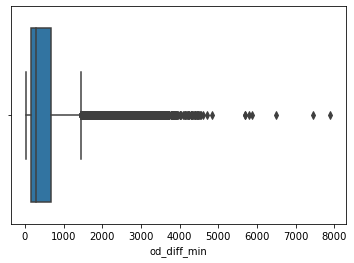

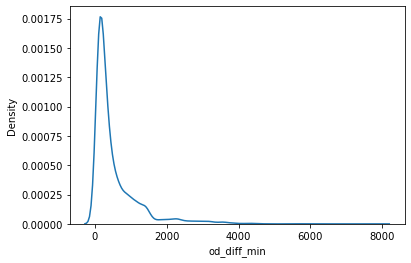

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) actual_distance_to_destination 2124
---------------------------------------------------
number of Outliers for column(low end) actual_distance_to_destination 0
----------------------------------------------------
minimum value of column actual_distance_to_destination 9.00246144174878
maximum value of column actual_distance_to_destination 85110.88509258963
mean value of column actual_distance_to_destination 2290.6736746939246


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


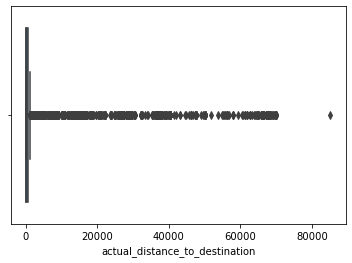

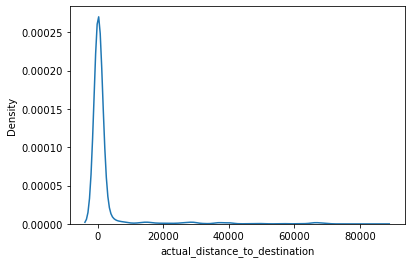

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) actual_time 1058
---------------------------------------------------
number of Outliers for column(low end) actual_time 0
----------------------------------------------------
minimum value of column actual_time 9.0
maximum value of column actual_time 6265.0
mean value of column actual_time 356.30601203760057


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


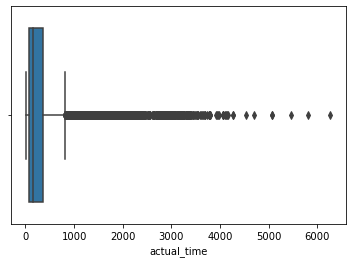

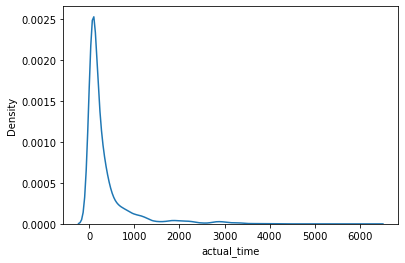

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) segment_actual_time 1087
---------------------------------------------------
number of Outliers for column(low end) segment_actual_time 0
----------------------------------------------------
minimum value of column segment_actual_time 9.0
maximum value of column segment_actual_time 6230.0
mean value of column segment_actual_time 353.0591735984311


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


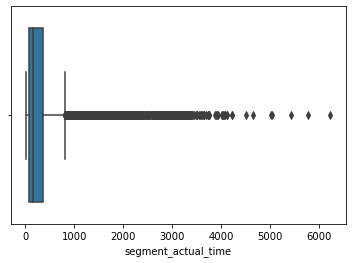

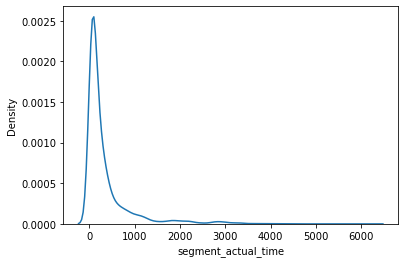

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) osrm_time 446
---------------------------------------------------
number of Outliers for column(low end) osrm_time 0
----------------------------------------------------
minimum value of column osrm_time 6.0
maximum value of column osrm_time 2032.0
mean value of column osrm_time 160.99093798606884


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


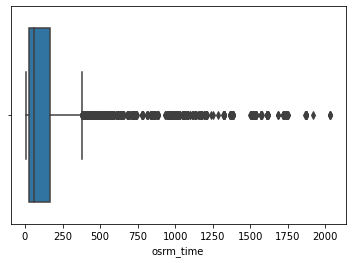

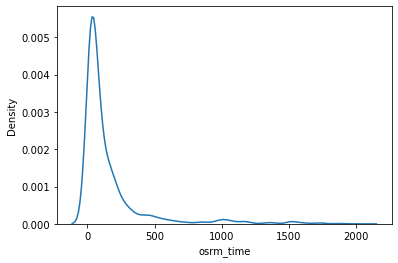

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) segment_osrm_time 830
---------------------------------------------------
number of Outliers for column(low end) segment_osrm_time 0
----------------------------------------------------
minimum value of column segment_osrm_time 6.0
maximum value of column segment_osrm_time 2564.0
mean value of column segment_osrm_time 180.5115980252925


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


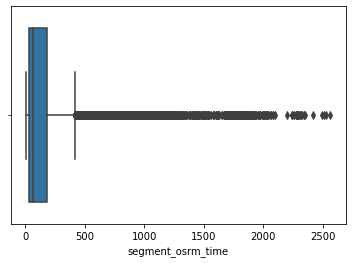

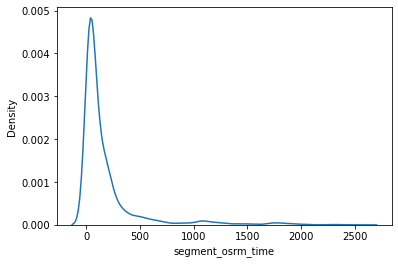

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) osrm_distance 1522
---------------------------------------------------
number of Outliers for column(low end) osrm_distance 0
----------------------------------------------------
minimum value of column osrm_distance 9.0729
maximum value of column osrm_distance 2840.081
mean value of column osrm_distance 203.88741124636502


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


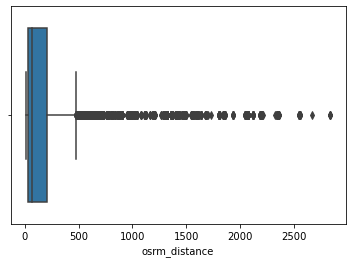

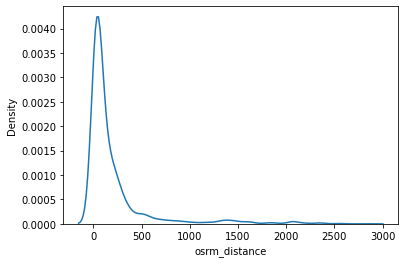

---------------------------*********************************--------------------------------------------
Outliers
number of Outliers for column(high end) segment_osrm_distance 1550
---------------------------------------------------
number of Outliers for column(low end) segment_osrm_distance 0
----------------------------------------------------
minimum value of column segment_osrm_distance 9.0729
maximum value of column segment_osrm_distance 3523.6324000000004
mean value of column segment_osrm_distance 222.70546644349787


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


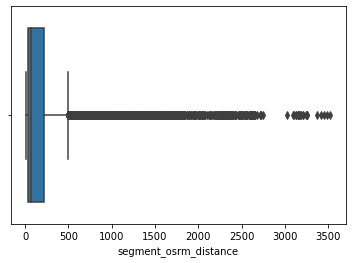

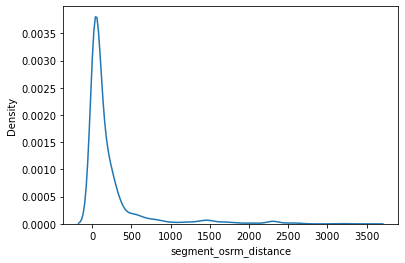

---------------------------*********************************--------------------------------------------


In [40]:
for i in df_final.columns[22:]:
    detetct_out(df_final,i)

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14787 entries, 0 to 14786
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   route_schedule_uuid             14787 non-null  object        
 2   trip_uuid                       14787 non-null  object        
 3   source_center_x                 14787 non-null  object        
 4   source_name_x                   14787 non-null  object        
 5   source_city                     14787 non-null  object        
 6   source_place                    14787 non-null  object        
 7   source_code                     14787 non-null  object        
 8   source_state                    14787 non-null  object        
 9   destination_center_x            14787 non-null  object        
 10  destination_name_x              14787 non-null  object        
 11  de

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data', ylabel='count'>

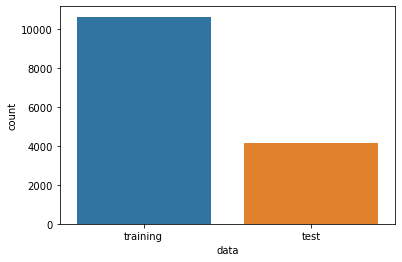

In [42]:
sns.countplot(df_final['data'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='route_type', ylabel='count'>

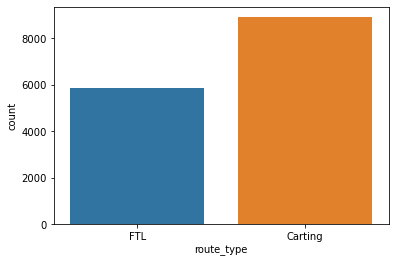

In [43]:
sns.countplot(df_final['route_type'])

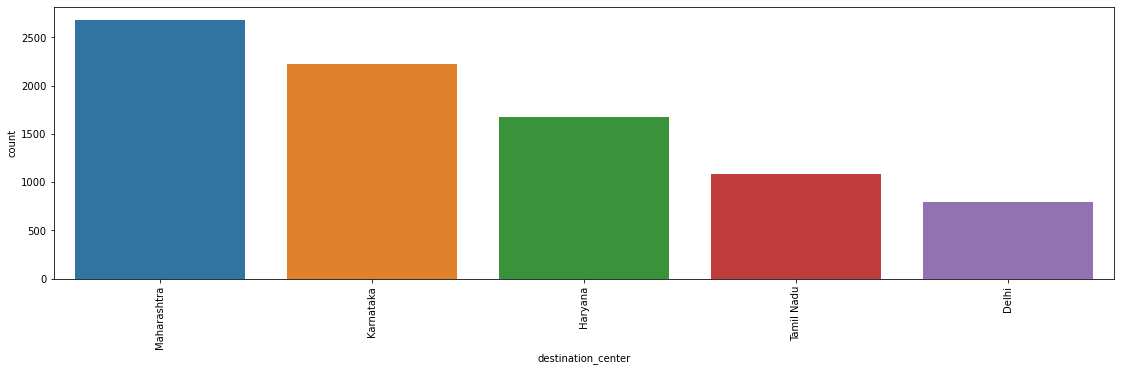

In [44]:
df_sor_city=df_final['source_state'].value_counts()[:5].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['source_state'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

OBSERVATION

Maharastra has highest number of  source trips 

RECOMENDATION

Its very likely to get more delivery from state maharastra , it is recomended to improve the transporting serveice



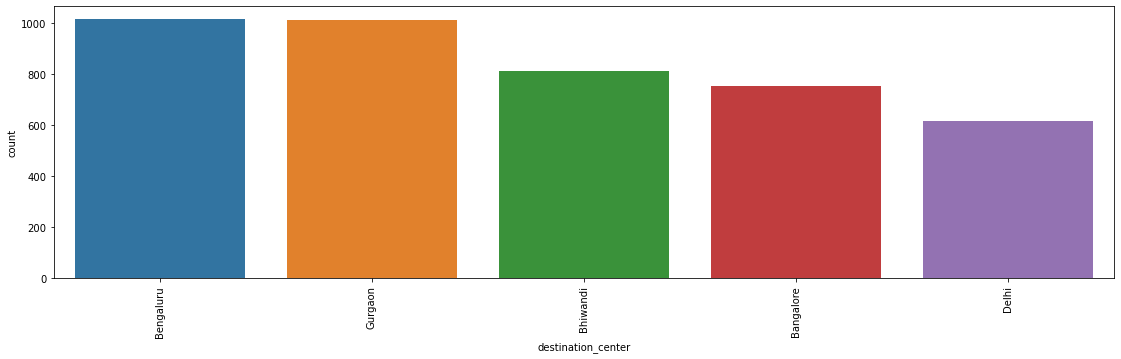

In [45]:
df_sor_city=df_final['source_city'].value_counts()[:5].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['source_city'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

OBSERVATION

Bengaluru city has highest number of source trips 

RECOMENDATION

Its very likely to get more delivery from city bengaluru , it is recomended to improve the transporting serveice

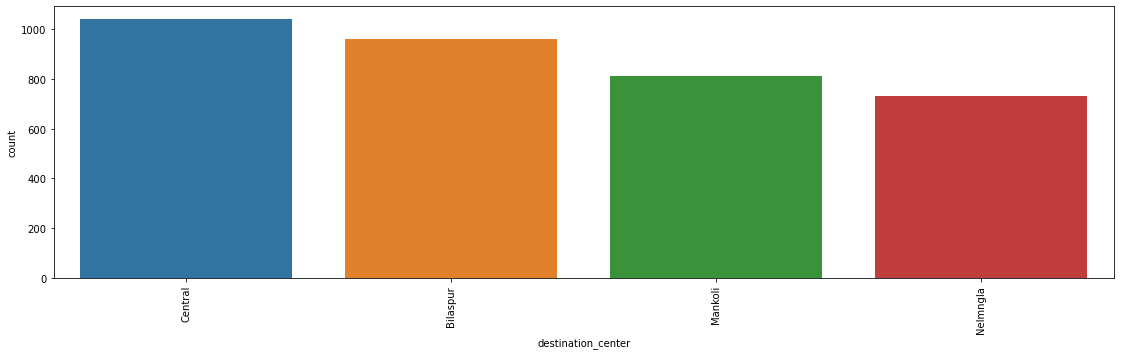

In [46]:
df_sor_city=df_final['source_place'].value_counts()[:4].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['source_place'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

OBSERVATION

Central has highest number of source trips 

RECOMENDATION

Its very likely to get more delivery from place Central , it is recomended to improve the transporting serveice

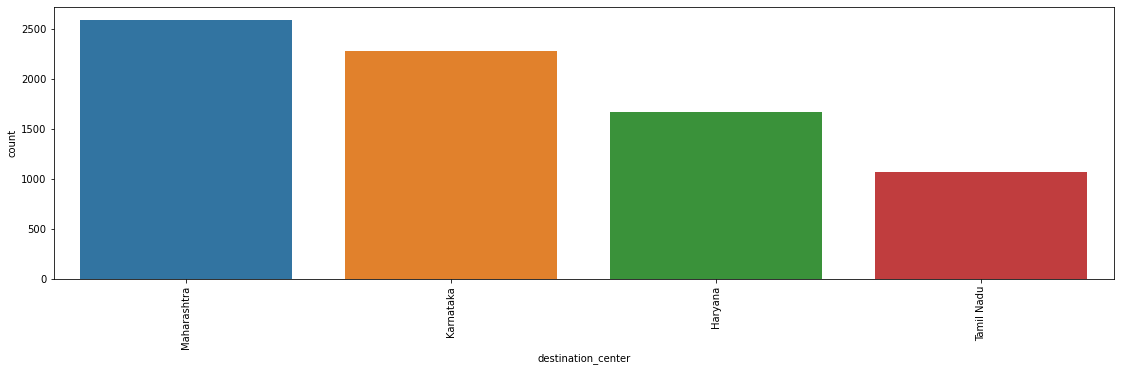

In [47]:
df_sor_city=df_final['destination_state'].value_counts()[:4].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['destination_state'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

OBSERVATION

Maharastra has highest number of destination trips 

RECOMENDATION

Its very likely to get more delivery to state maharastra , it is recomended to improve the transporting serveice

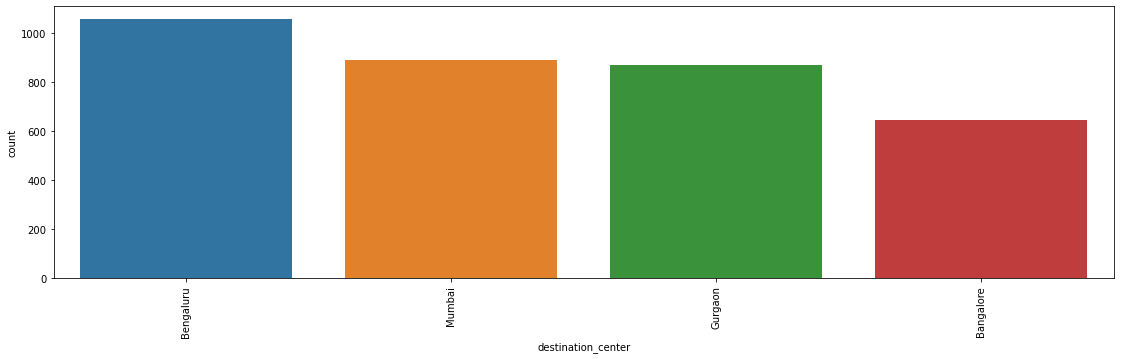

In [48]:
df_sor_city=df_final['destination_city'].value_counts()[:4].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['destination_city'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

OBSERVATION

Bengaluru has highest number of destination trips 

RECOMENDATION

Its very likely to get more delivery to city Bengaluru , it is recomended to improve the transporting serveice

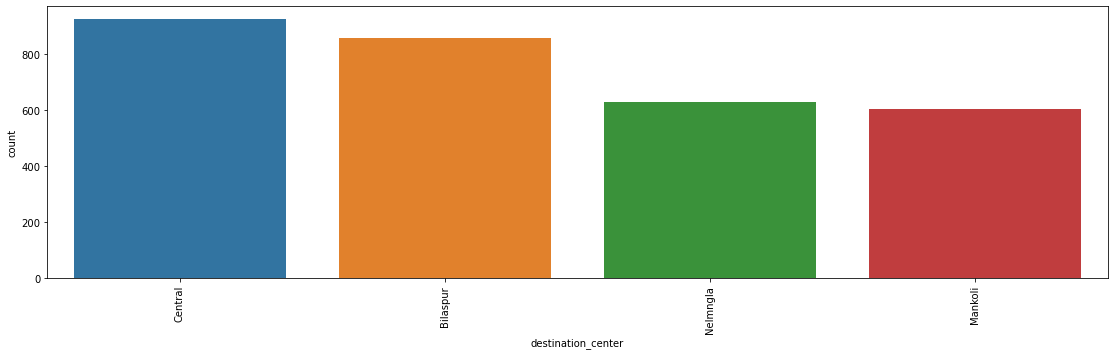

In [49]:
df_sor_city=df_final['destination_place'].value_counts()[:4].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['destination_place'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

In [ ]:
OBSERVATION

Central has highest number of destination trips 

RECOMENDATION

Its very likely to get more delivery to place Central , it is recomended to improve the transporting serveice

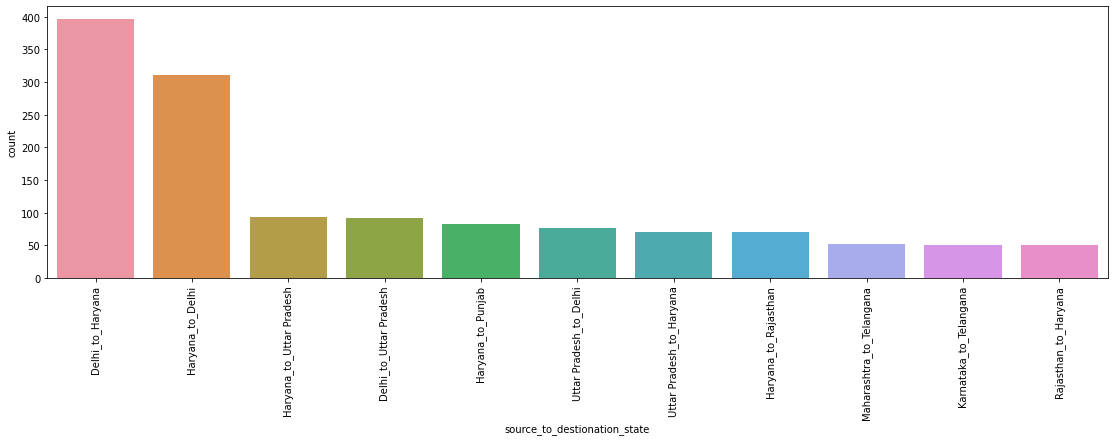

In [50]:
df_g_b=df_final.groupby(['source_state','destination_state'])['trip_uuid'].count().reset_index()
df_g_b=df_g_b.sort_values('trip_uuid',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_state']!=df_g_b['destination_state']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_state"]=df_g_b['source_state']+"_to_"+df_g_b['destination_state']
sns.barplot(data=df_g_b,x='source_to_destionation_state',y='trip_uuid')
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

Delhi to Haryana has highest number of trips (state to state) transport

Improve the delivery transport services

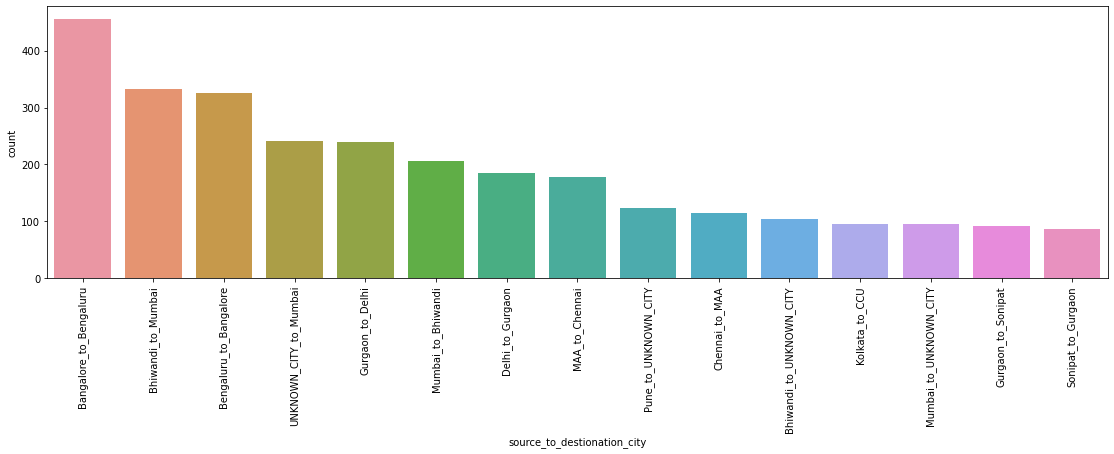

In [51]:
df_g_b=df_final.groupby(['source_city','destination_city'])['trip_uuid'].count().reset_index()
df_g_b=df_g_b.sort_values('trip_uuid',ascending=False).head(30)
df_g_b=df_g_b[(df_g_b['source_city']!=df_g_b['destination_city'])]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_city"]=df_g_b['source_city']+"_to_"+df_g_b['destination_city']
sns.barplot(data=df_g_b,x='source_to_destionation_city',y='trip_uuid')
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

Bhiwandi to mumbai has highest number if trips (city to city)

Improve the delivery transport services


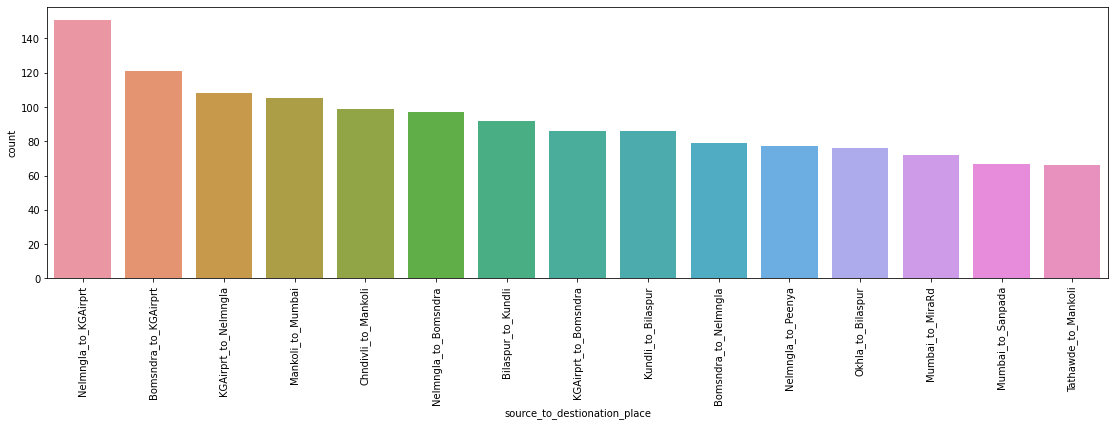

In [52]:
df_g_b=df_final.groupby(['source_place','destination_place'])['trip_uuid'].count().reset_index()
df_g_b=df_g_b.sort_values('trip_uuid',ascending=False).head(25)
df_g_b=df_g_b[(df_g_b['source_place']!=df_g_b['destination_place'])]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_place"]=df_g_b['source_place']+"_to_"+df_g_b['destination_place']
sns.barplot(data=df_g_b,x='source_to_destionation_place',y='trip_uuid')
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

Nelmngla  to KGAirport has highest number if trips (Place to Place)

Improve the delivery transport services

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

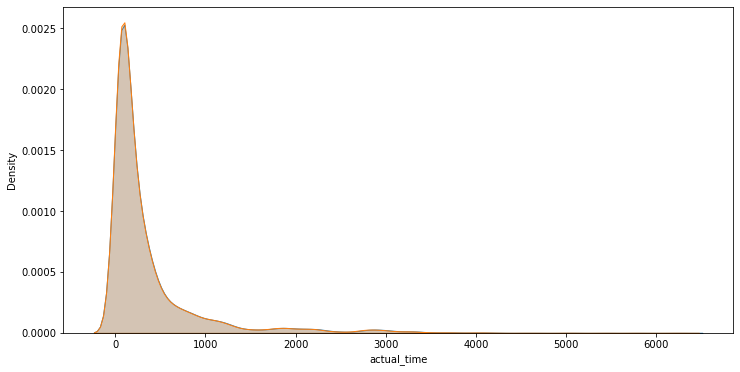

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['actual_time'],ax=ax,fill=True)
sns.kdeplot(df_final['segment_actual_time'],ax=ax,fill=True)

We dont see much difference from actual time and segmented actual time

<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

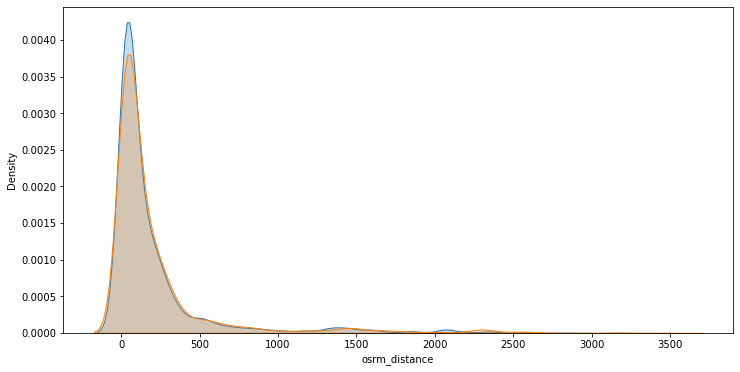

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['osrm_distance'],ax=ax,fill=True)
sns.kdeplot(df_final['segment_osrm_distance'],ax=ax,fill=True)

There is a diff btw osrm_distance and segment_osrm_distance

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

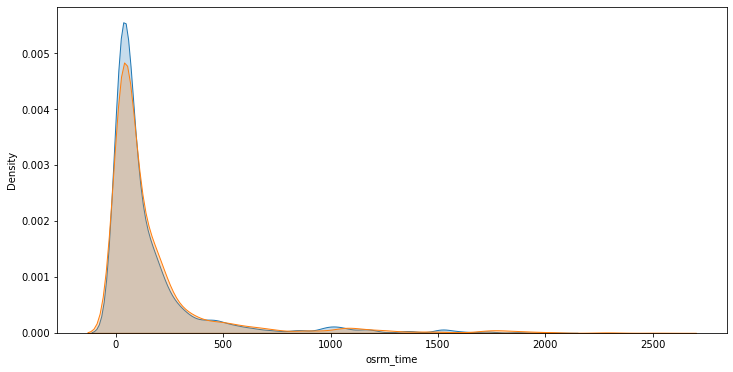

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['osrm_time'],ax=ax,fill=True)
sns.kdeplot(df_final['segment_osrm_time'],ax=ax,fill=True)

There is a diff btw osrm_time and segment_osrm_time

<AxesSubplot:xlabel='od_diff_min', ylabel='Density'>

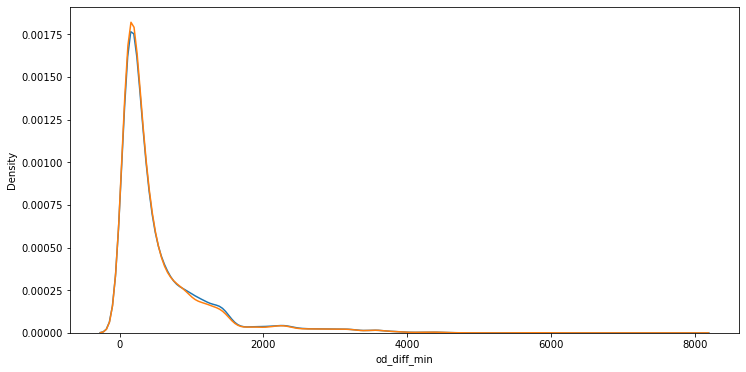

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['od_diff_min'],ax=ax)
sns.kdeplot(df_final['start_scan_to_end_scan'],ax=ax)

There is a diff btw (od_start-od_end) and start_scan_to_end_scan

#### most time counsuming delivery state ,city ,place

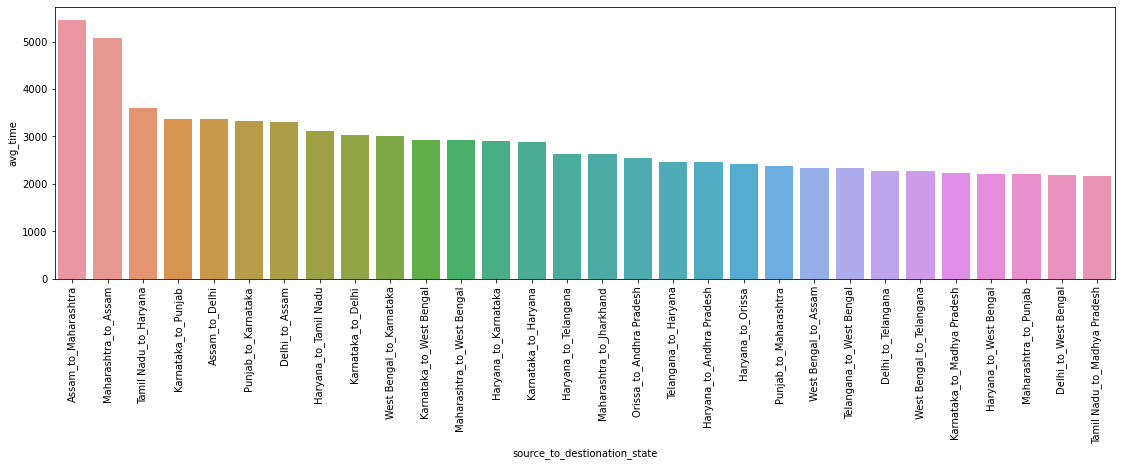

In [57]:
df_g_b=df_final.groupby(['source_state','destination_state'])['actual_time'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_time',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_state']!=df_g_b['destination_state']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_state"]=df_g_b['source_state']+"_to_"+df_g_b['destination_state']
sns.barplot(data=df_g_b,x='source_to_destionation_state',y='actual_time')
plt.xticks(rotation=90)
plt.ylabel("avg_time")
plt.show()

Assam to Maharastra is the most time counsuming delivery happens

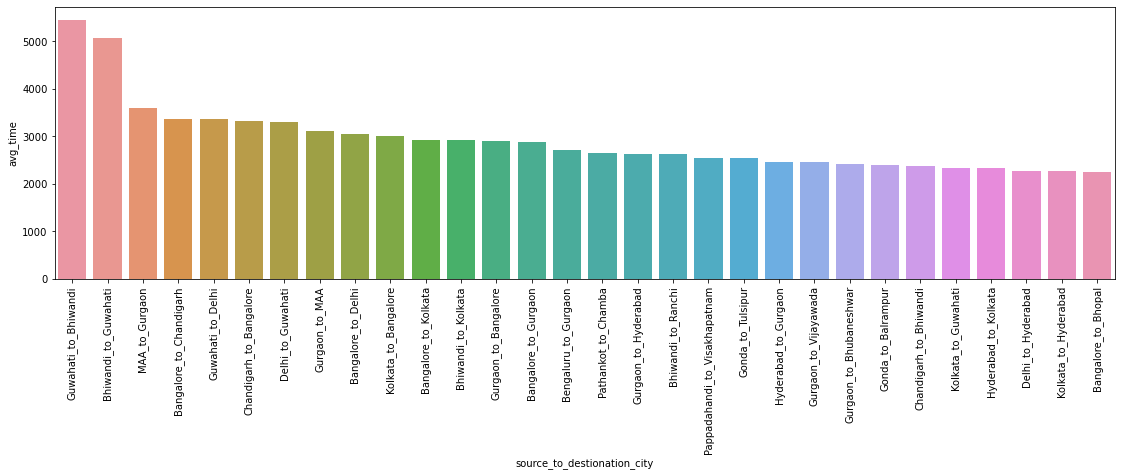

In [58]:
df_g_b=df_final.groupby(['source_city','destination_city'])['actual_time'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_time',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_city']!=df_g_b['destination_city']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_city"]=df_g_b['source_city']+"_to_"+df_g_b['destination_city']
sns.barplot(data=df_g_b,x='source_to_destionation_city',y='actual_time')
plt.xticks(rotation=90)
plt.ylabel("avg_time")
plt.show()

Guwahati to Bhiwandi is the most time counsuming delivery happens (city to city)

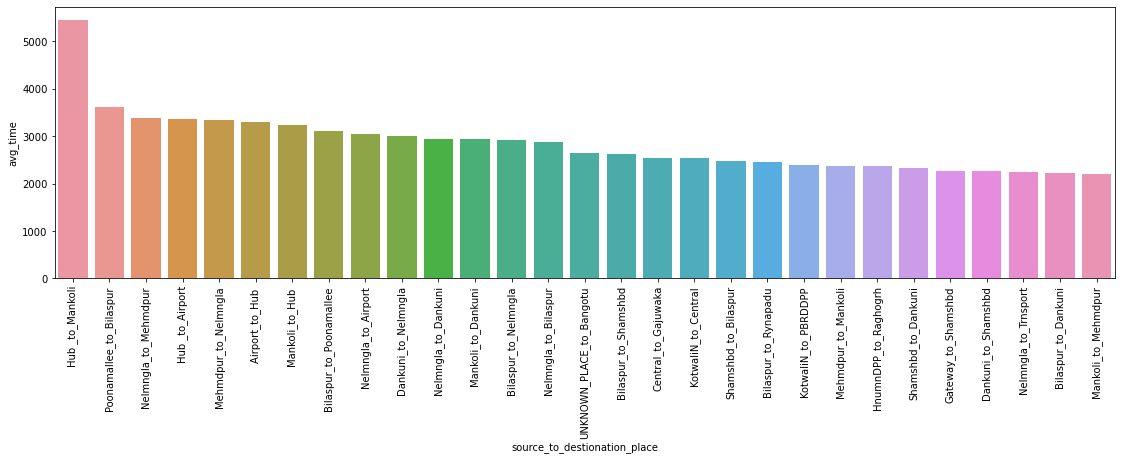

In [59]:
df_g_b=df_final.groupby(['source_place','destination_place'])['actual_time'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_time',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_place']!=df_g_b['destination_place']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_place"]=df_g_b['source_place']+"_to_"+df_g_b['destination_place']
sns.barplot(data=df_g_b,x='source_to_destionation_place',y='actual_time')
plt.xticks(rotation=90)
plt.ylabel("avg_time")
plt.show()

Hub to Mankoli is the most time counsuming delivery happens (place to place)

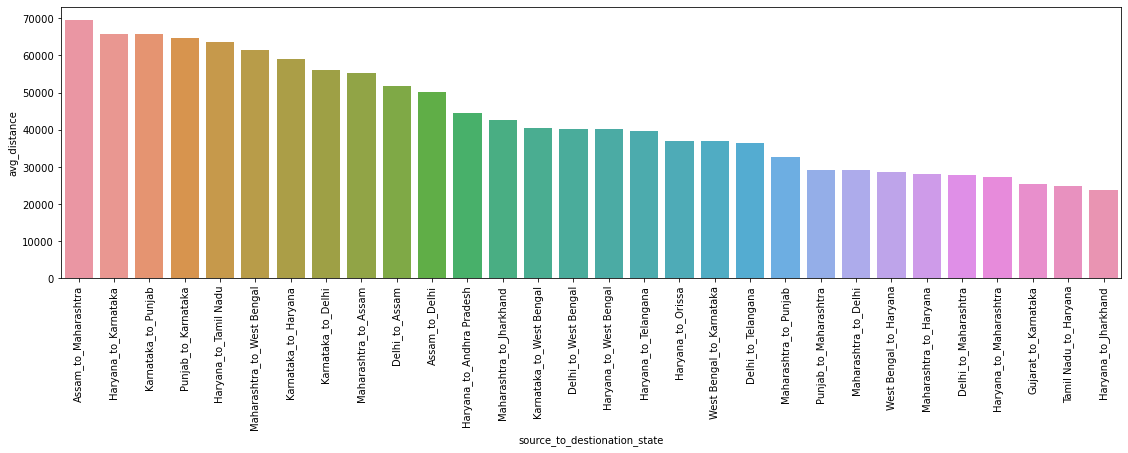

In [60]:
df_g_b=df_final.groupby(['source_state','destination_state'])['actual_distance_to_destination'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_distance_to_destination',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_state']!=df_g_b['destination_state']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_state"]=df_g_b['source_state']+"_to_"+df_g_b['destination_state']
sns.barplot(data=df_g_b,x='source_to_destionation_state',y='actual_distance_to_destination')
plt.xticks(rotation=90)
plt.ylabel("avg_distance")
plt.show()

Assam to Maharastra is the most time counsuming delivery happens

beacuse it has highest distance

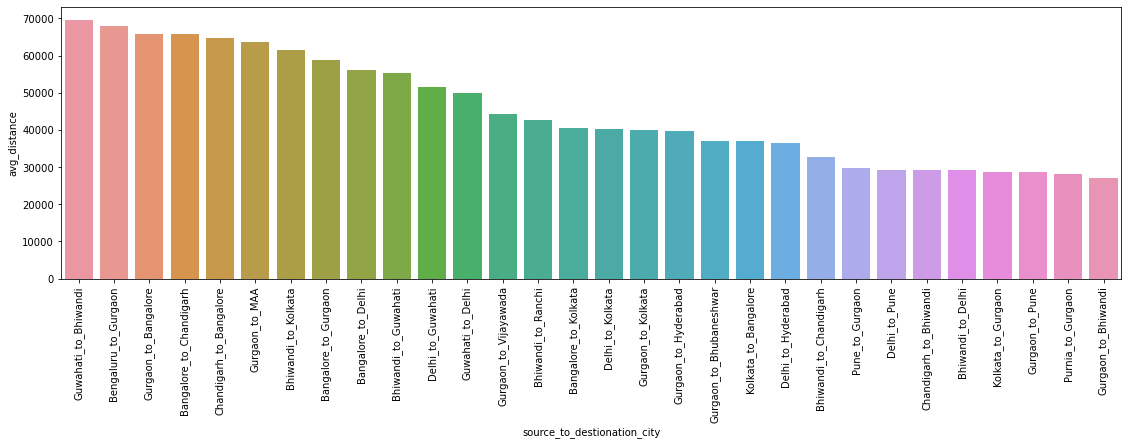

In [61]:
df_g_b=df_final.groupby(['source_city','destination_city'])['actual_distance_to_destination'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_distance_to_destination',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_city']!=df_g_b['destination_city']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_city"]=df_g_b['source_city']+"_to_"+df_g_b['destination_city']
sns.barplot(data=df_g_b,x='source_to_destionation_city',y='actual_distance_to_destination')
plt.xticks(rotation=90)
plt.ylabel("avg_distance")
plt.show()

Guwahati to Bhiwandi is the most time counsuming delivery happens (city to city)

because it has highest distance

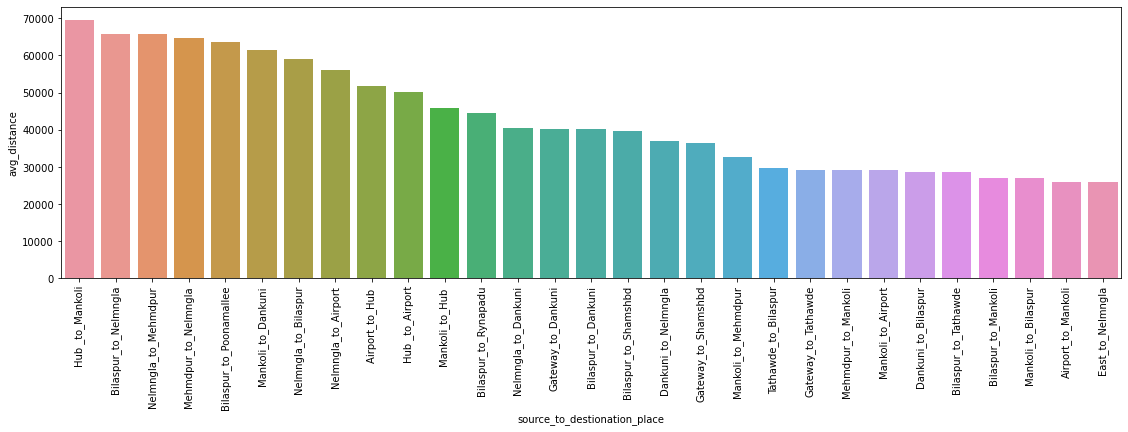

In [62]:
df_g_b=df_final.groupby(['source_place','destination_place'])['actual_distance_to_destination'].mean().reset_index()
df_g_b=df_g_b.sort_values('actual_distance_to_destination',ascending=False).head(30)
df_g_b=df_g_b[df_g_b['source_place']!=df_g_b['destination_place']]

plt.figure(figsize=(19,5))
df_g_b["source_to_destionation_place"]=df_g_b['source_place']+"_to_"+df_g_b['destination_place']
sns.barplot(data=df_g_b,x='source_to_destionation_place',y='actual_distance_to_destination')
plt.xticks(rotation=90)
plt.ylabel("avg_distance")
plt.show()

Hub to Mankoli is the most time counsuming delivery happens (place to place)

because it hase highest distance

#### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [63]:
df_final.columns

Index(['data', 'route_schedule_uuid', 'trip_uuid', 'source_center_x',
       'source_name_x', 'source_city', 'source_place', 'source_code',
       'source_state', 'destination_center_x', 'destination_name_x',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'trip_creation_time', 'trip_creation_time_month',
       'trip_creation_time_day', 'trip_creation_time_year', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'od_diff_min',
       'actual_distance_to_destination', 'actual_time', 'segment_actual_time',
       'osrm_time', 'segment_osrm_time', 'osrm_distance',
       'segment_osrm_distance'],
      dtype='object')

In [64]:
df_final['od_diff_min']

0        2260.109800
1         181.611874
2        3934.362520
3         100.494935
4         718.349042
            ...     
14782     405.485842
14783      60.590521
14784     422.119867
14785     348.512862
14786     354.407571
Name: od_diff_min, Length: 14787, dtype: float64

<AxesSubplot:xlabel='od_diff_min', ylabel='Density'>

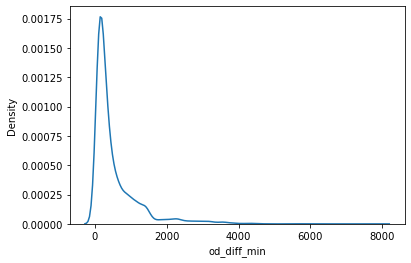

In [65]:
sns.kdeplot(df_final['od_diff_min'])

#### Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [66]:
df_final[['od_diff_min','start_scan_to_end_scan']]

,od_diff_min,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14782,405.485842,257.0
14783,60.590521,60.0
14784,422.119867,421.0
14785,348.512862,347.0


<AxesSubplot:xlabel='od_diff_min', ylabel='Density'>

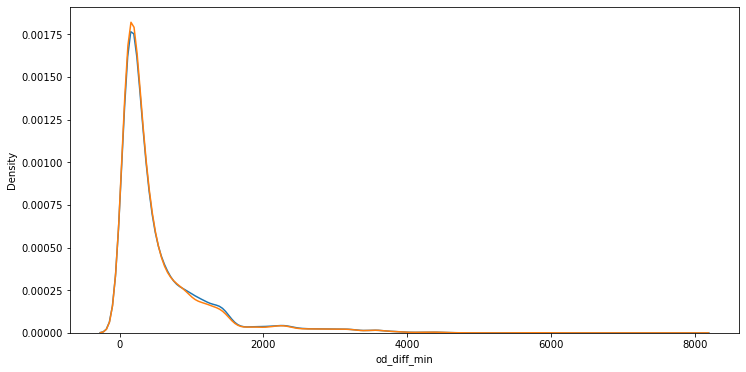

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['od_diff_min'],ax=ax)
sns.kdeplot(df_final['start_scan_to_end_scan'],ax=ax)

#### We do Hypothesis testing to Check difference between start_end_diff and start_scan_to_end_scan
* Null Hypothesis - There is no difference between od_diff_min and start_scan_to_end_scan
* Alternative Hypothesis - There is significant difference between od_diff_min and start_scan_to_end_scan

In [68]:
stat.ttest_ind(df_final['start_scan_to_end_scan'], df_final['od_diff_min'])

Ttest_indResult(statistic=-2.1662439760977112, pvalue=0.0303005107081912)

In [69]:
stat.mannwhitneyu(df_final['start_scan_to_end_scan'], df_final['od_diff_min'])

MannwhitneyuResult(statistic=107632109.0, pvalue=0.010450957982963194)

#### Because P Value is less than 0.05, we reject the Null Hypothesis
#### The difference between start_scan_to_end_scan and od_diff_min is  significant

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

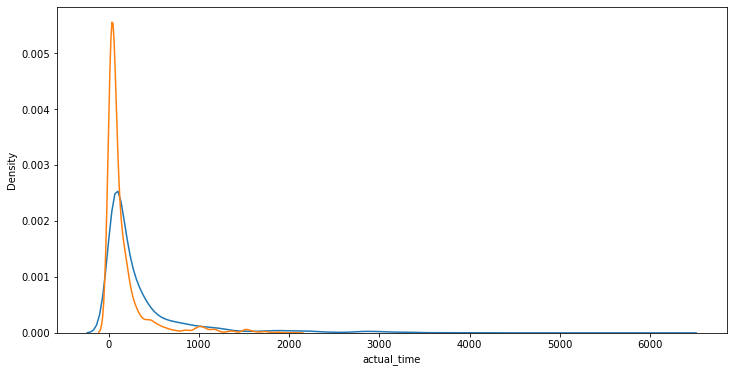

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['actual_time'],ax=ax)
sns.kdeplot(df_final['osrm_time'],ax=ax)

#### We do Hypothesis testing to Check difference between actual_time and osrm_time (aggr)
* Null Hypothesis - There is no difference between actual_time and osrm_time
* Alternative Hypothesis - There is significant difference between actual_time and osrm_time

In [71]:
stat.ttest_ind(df_final['actual_time'], df_final['osrm_time'])

Ttest_indResult(statistic=38.080715677235965, pvalue=8.2146191343447e-310)

In [72]:
stat.mannwhitneyu(df_final['actual_time'], df_final['osrm_time'])

MannwhitneyuResult(statistic=66478793.5, pvalue=0.0)

#### Becuase P Value is less than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between Actual_time aggregated value and OSRM time aggregated is Significant

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

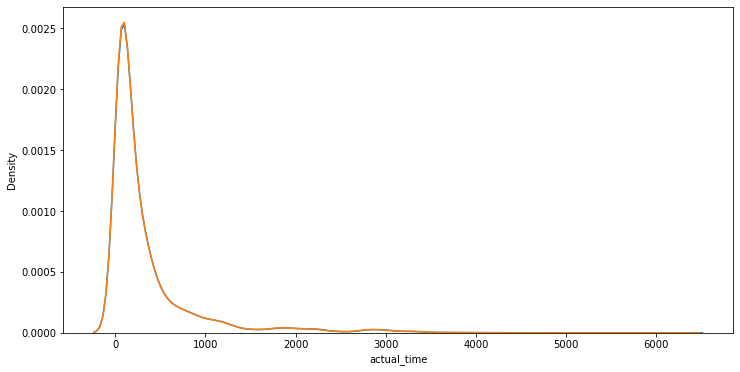

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['actual_time'],ax=ax)
sns.kdeplot(df_final['segment_actual_time'],ax=ax)

#### We do Hypothesis testing to Check difference between actual_time and segment_actual_time 
* Null Hypothesis - There is no difference between actual_time and segment_actual_time
* Alternative Hypothesis - There is significant difference between actual_time and segment_actual_time

In [74]:
stat.ttest_ind(df_final['actual_time'], df_final['segment_actual_time'])

Ttest_indResult(statistic=0.499475764573994, pvalue=0.6174479719707524)

In [75]:
stat.mannwhitneyu(df_final['actual_time'], df_final['segment_actual_time'])

MannwhitneyuResult(statistic=108730315.5, pvalue=0.20789300965812607)

#### Becuase P Value is greater than 0.05, we fail to reject the Null Hypothesis
#### We can conclude that the difference between  Actual_time aggregated value and Segment Actual time aggregated value is not Significant

#### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

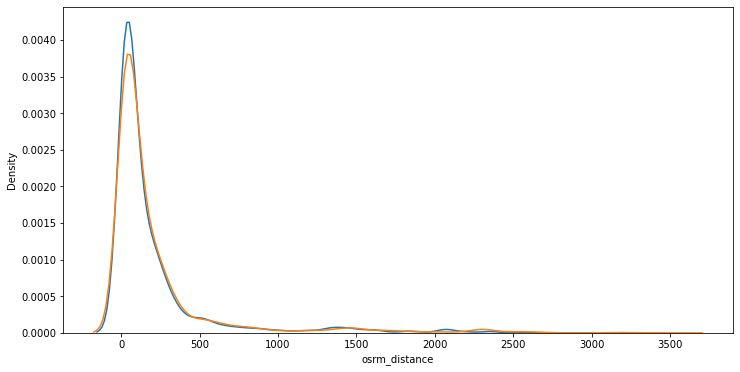

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['osrm_distance'],ax=ax)
sns.kdeplot(df_final['segment_osrm_distance'],ax=ax)

#### We do Hypothesis testing to Check difference between segment_osrm_distance and osrm_distance 
* Null Hypothesis - There is no difference between segment_osrm_distance and osrm_distance
* Alternative Hypothesis - There is significant difference between segment_osrm_distance and osrm_distance

In [77]:
stat.ttest_ind(df_final['segment_osrm_distance'], df_final['osrm_distance'])

Ttest_indResult(statistic=4.102786976805513, pvalue=4.0929578191203324e-05)

In [78]:
stat.mannwhitneyu(df_final['segment_osrm_distance'], df_final['osrm_distance'])

MannwhitneyuResult(statistic=105736792.0, pvalue=5.00109771681917e-07)

#### Becuase P Value is lesser than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between  OSRM_distance aggregated value and Segment OSRM Distance aggregated value is Significant

#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid) 

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

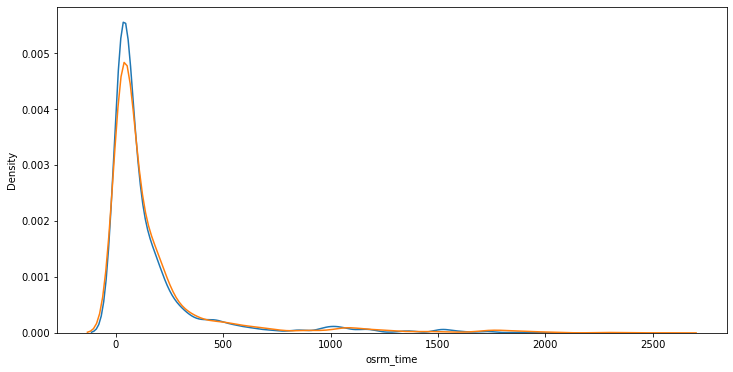

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_final['osrm_time'],ax=ax)
sns.kdeplot(df_final['segment_osrm_time'],ax=ax)

#### We do Hypothesis testing to Check difference between OSRM_time aggregated value and Segment OSRM time aggregated value
* Null Hypothesis - There is no difference between OSRM_time aggregated value and Segment OSRM time aggregated value
* Alternative Hypothesis - There is significant difference between OSRM_time aggregated value and Segment OSRM time aggregated value

In [80]:
stat.ttest_ind(df_final['segment_osrm_time'], df_final['osrm_time'])

Ttest_indResult(statistic=5.711782161676085, pvalue=1.128703468644937e-08)

In [81]:
stat.mannwhitneyu(df_final['segment_osrm_time'], df_final['osrm_time'])

MannwhitneyuResult(statistic=105235964.5, pvalue=1.2446765795661789e-08)

#### Becuase P Value is lesser than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between two value is Significant.

In [82]:
df_final['route_Carting'] = pd.get_dummies(df_final.route_type, prefix='route').loc[:, 'route_Carting']
df_final['route_FTL'] = pd.get_dummies(df_final.route_type, prefix='route').loc[:, 'route_FTL']

In [83]:
df_final[['route_Carting', 'route_FTL']].head(10)

,route_Carting,route_FTL
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


#### MinMax Scaling 

### MinMax Scaler


Following are the Columns which we will Scale - 

* start_scan_to_end_scan
* actual_distance_to_destination
* segment_osrm_distance
* actual_time
* osrm_time
* osrm_distance
* segment_actual_time
* segment_osrm_time

In [84]:
from sklearn.preprocessing import MinMaxScaler
df_final_train = df_final[df_final['data']=='training']
df_final_test = df_final[df_final['data']=='test']

MMS = MinMaxScaler()

In [85]:
# Fitting the Standard Sclaer
MMS.fit(df_final_train[['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

MinMaxScaler()

In [86]:
# Trasnforming the Data using MinMax Sclaer
df_final_train.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']] = MMS.transform(df_final_train.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

df_final_test.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']] = MMS.transform(df_final_test.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

C:\Users\Abhilash\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Abhilash\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [87]:
df_final_train[['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']].head(2)

,start_scan_to_end_scan,actual_distance_to_destination,segment_osrm_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time
0,0.382811,0.104014,0.373134,0.307083,0.350791,0.347060,0.306497,0.391474
1,0.026879,0.002717,0.021373,0.026316,0.030138,0.026866,0.026106,0.022683


In [88]:
df_final_test[['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']].head(2)

,start_scan_to_end_scan,actual_distance_to_destination,segment_osrm_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time
10645,0.020887,0.002756,0.016622,0.023348,0.016304,0.016889,0.023117,0.015643
10646,0.009930,0.000223,0.003602,0.009497,0.004941,0.004472,0.009566,0.003911


### Outlier removal

In [89]:
def outlier(data):
    '''
    Function to Identify Outliers and Impute the Outliers using IQR Method
    '''
    for i in data:
        if (data[i].dtype == np.float) | (data[i].dtype == np.int):
    
            iqr = np.percentile(data[i].values, 75) - np.percentile(data[i].values, 25)
            upper_limit = np.percentile(data[i].values, 75) + iqr*1.5 
            lower_limit = np.percentile(data[i].values, 25) - iqr*1.5 
            
            data[i][(data[i]<lower_limit)] = lower_limit
            data[i][(data[i]>upper_limit)] = upper_limit
                           
                           
    return data

In [90]:
dt_cleaned = outlier(df_final)

<ipython-input-89-004613b585d4>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (data[i].dtype == np.float) | (data[i].dtype == np.int):
<ipython-input-89-004613b585d4>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [91]:
dt_cleaned

,data,route_schedule_uuid,trip_uuid,source_center_x,source_name_x,source_city,source_place,source_code,source_state,destination_center_x,...,od_diff_min,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_Carting,route_FTL
0,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Bhopal,Trnsport,H,Madhya Pradesh,IND000000ACB,...,1450.210152,1077.146338,817.0,811.0,376.5,415.0,470.47515,492.533225,0,1
1,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Tumkur,Veersagr,I,Karnataka,IND562101AAA,...,181.611874,240.208306,143.0,141.0,68.0,65.0,85.11100,84.189400,1,0
2,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Bangalore,Nelmngla,H,Karnataka,IND160002AAC,...,1450.210152,1077.146338,817.0,811.0,376.5,415.0,470.47515,492.533225,0,1
3,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),UNKNOWN_CITY,Mumbai,Hub,Maharashtra,IND401104AAA,...,100.494935,28.529648,59.0,59.0,15.0,16.0,19.68000,19.876600,1,0
4,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,UNKNOWN_PLACE,Dc,Karnataka,IND583101AAA,...,718.349042,239.007304,341.0,340.0,117.0,115.0,146.79180,146.791900,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Mehmdpur,H,Punjab,IND160002AAC,...,405.485842,141.057373,83.0,82.0,62.0,62.0,73.46300,64.855100,1,0
14783,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),FBD,Balabhgarh,DPC,Haryana,IND121004AAA,...,60.590521,25.130640,21.0,21.0,12.0,11.0,16.08820,16.088300,1,0
14784,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,H6,Uttar Pradesh,IND209304AAA,...,422.119867,93.743842,282.0,281.0,48.0,88.0,58.90370,104.886600,1,0
14785,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli,VdkkuSrt,I,Tamil Nadu,IND627005AAA,...,348.512862,355.281673,264.0,258.0,179.0,221.0,171.11030,223.532400,1,0


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_time'>

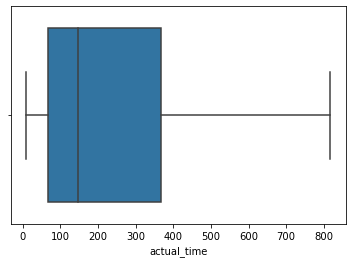

In [92]:
sns.boxplot(dt_cleaned['actual_time'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='segment_actual_time'>

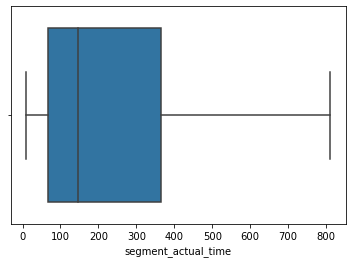

In [93]:
sns.boxplot(dt_cleaned['segment_actual_time'])

No outliers in the data

## Recomendations - 

The below points may lead to mis calculations - 
* The Actual Time and OSRM time have significant difference between them.
* The difference between OSRM distance and OSRM Segmented Distance is also Significant
* Similarly the difference between OSRM time and OSRM time aggregated is significant.



* The difference between Actual Time and OSRM is Significant. This can cause a very major impact on the comapny. Becuase the OSRM wrongly predicts the estimated time, the customers might get a wrong estimate, and might receive their packages with delay.


* OSRM_distance aggregated value and Segment OSRM Distance AND OSRM_time aggregated value and Segment OSRM time aggregated value have significant difference. These may lead to a major issues in the operations.

